In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv("url_spam_classification.csv")

In [7]:
df.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


In [8]:
df.shape

(148303, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148303 entries, 0 to 148302
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   url      148303 non-null  object
 1   is_spam  148303 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 1.3+ MB


In [11]:
df.isnull().sum()

,0
url,0
is_spam,0


In [12]:
df.duplicated().sum()

60722

In [13]:
df = df.drop_duplicates(keep = 'first')


In [14]:
df.duplicated().sum()


0

In [15]:
df.shape


(87581, 2)

# EDA

In [16]:
df['is_spam'].value_counts()


,count
is_spam,
False,84796
True,2785


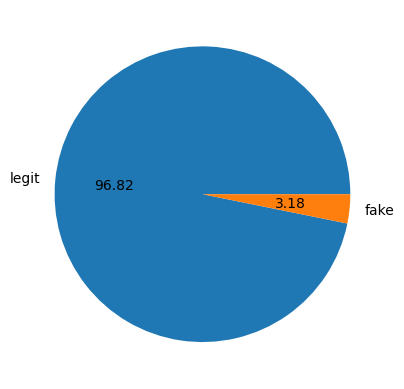

In [17]:
plt.pie(df['is_spam'].value_counts(), labels = ['legit','fake'], autopct = '%0.2f')
plt.show()

In [19]:
df['len_url'] = df['url'].apply(lambda x : len(x))
df['contains_subscribe'] = df['url'].apply(lambda x : 1 if "subscribe" in x else 0)
df['contains_hash'] = df['url'].apply(lambda x : 1 if "#" in x else 0)
df['num_digits'] = df['url'].apply(lambda x : len("".join(_ for _ in x if _.isdigit())) )
df['non_https'] = df['url'].apply(lambda x : 1 if "https" in x else 0)
df['num_words'] = df['url'].apply(lambda x : len(x.split("/")))

In [20]:
df.head()

,url,is_spam,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words
0,https://briefingday.us8.list-manage.com/unsubs...,True,51,1,0,1,1,4
1,https://www.hvper.com/,True,22,0,0,0,1,4
2,https://briefingday.com/m/v4n3i4f3,True,34,0,0,4,1,5
3,https://briefingday.com/n/20200618/m#commentform,False,48,0,1,8,1,6
4,https://briefingday.com/fan,True,27,0,0,0,1,4


In [41]:
df.shape

(87581, 8)

In [22]:
fig = px.histogram(df, x="len_url", color="is_spam")
fig.update_layout(title = "URLs length by Spam / Non Spam", xaxis_title="URL Length", yaxis_title = "", plot_bgcolor="#fff", showlegend = False)
fig.show()

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve


In [24]:
target = 'is_spam'

In [25]:
features = [f for f in df.columns if f not in ["url", target]]
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=0)


In [26]:
sc = MinMaxScaler()
clf = LogisticRegression()
pipe_lr = Pipeline([('scaler', sc), ('clf', clf)])
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('clf', LogisticRegression())])

In [27]:
test_probas = pipe_lr.predict_proba(X_test)[:,1]


ROC-AUC-score:  0.8009653268408132


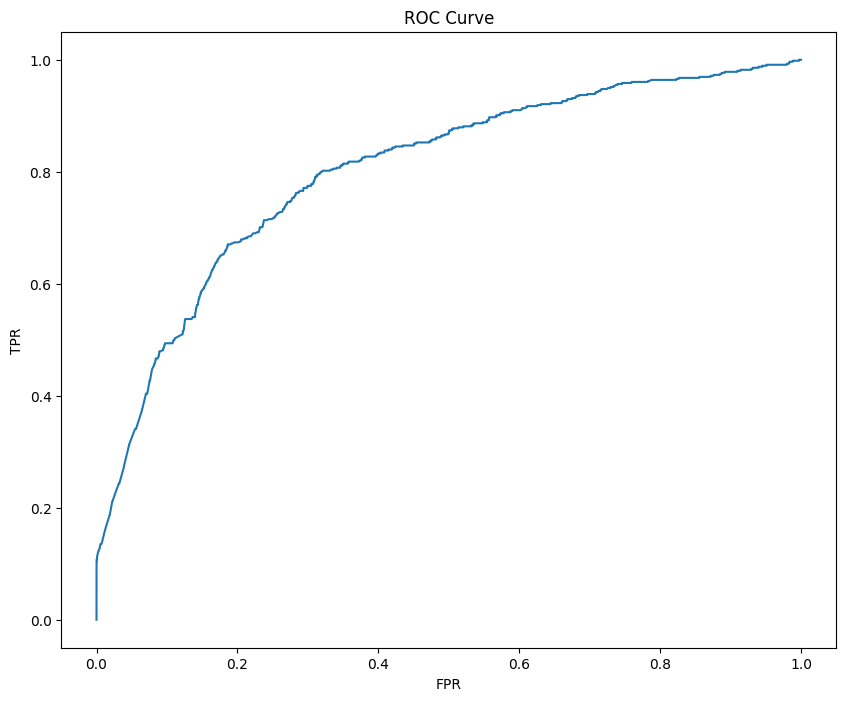

In [28]:
plt.figure(figsize=(10,8))
fpr, tpr, tresholds = roc_curve(y_test, test_probas)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')



In [29]:
print('ROC-AUC-score: ', roc_auc_score(y_test, test_probas))

ROC-AUC-score:  0.8009653268408132


In [44]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

target = 'is_spam'
features = [f for f in df.columns if f not in ["url", target]]
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=0)

In [45]:
sc = MinMaxScaler()
clf = DecisionTreeClassifier()#ExtraTreesClassifier()
pipe_clf = Pipeline([('scaler', sc), ('clf', clf)])
pipe_clf.fit(X_train, y_train)


Pipeline(steps=[('scaler', MinMaxScaler()), ('clf', DecisionTreeClassifier())])

In [46]:
test_probas = pipe_clf.predict_proba(X_test)[:,1]

Text(0, 0.5, 'TPR')

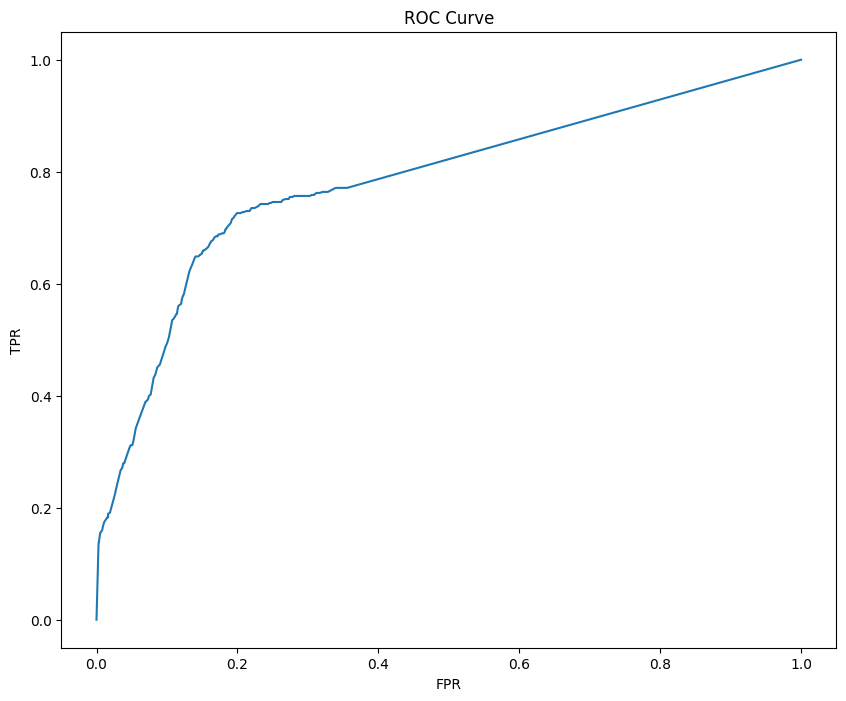

In [47]:
plt.figure(figsize=(10,8))
fpr, tpr, tresholds = roc_curve(y_test, test_probas)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')


In [48]:
print('ROC-AUC-score: ', roc_auc_score(y_test, test_probas))
print("Accuracy score {:.2f} %\n".format(pipe_clf.score(X_test,y_test)*100))
print(classification_report(y_test, pipe_clf.predict(X_test)))

ROC-AUC-score:  0.7827659282912203
Accuracy score 96.94 %

              precision    recall  f1-score   support

       False       0.97      1.00      0.98     16962
        True       0.57      0.14      0.22       555

    accuracy                           0.97     17517
   macro avg       0.77      0.57      0.60     17517
weighted avg       0.96      0.97      0.96     17517



In [59]:
x = str(input("Enter the url : "))#"https://www.visualcapitalist.com/growth-covid-19-united-states-peak/"
a = len(x)
b = lambda x : 1 if "subscribe" in x else 0
c = lambda x : 1 if "#" in x else 0
d = 0
for i in x:
    if i.isnumeric():
        d = d + 1
e = lambda x : 1 if "https" in x else 0
f = lambda x : len(x.split("/"))
print(a)
print(b(x), c(x), d, e(x), f(x))
input_data = (a,b(x),c(x),d,e(x),f(x))
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
#print(std_data)

prediction = clf.predict(input_data_reshaped)
#print(prediction)

if prediction[0] == 1:
    print("\nFake website")
else:
    print("\nGenuine site")

Enter the url : https://www.visualcapitalist.com/growth-covid-19-united-states-peak/
68
0 0 2 1 5

Genuine site


Genuine site
